# Task-1 To predict the percentage of a student on the number of study hours using SUPERVISED ML.

Author- YASH JHA

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# reading data
url= "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
s_data=pd.read_csv(url)
print("data imported sucessfully")
s_data.head(5)

data imported sucessfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Let's plot our data points on 2-D graph to eyeball our dataset and to see manually find any relationship between the data.

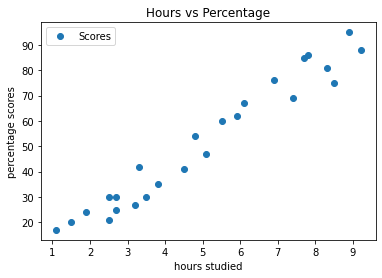

In [4]:
# plotting the distribution of scores
s_data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('hours studied')
plt.ylabel('percentage scores')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the no. of hours studied and the percentage scores.

PREPARING THE DATA

The next step is to divide the data into "Attributes"(inputs) and "labels"(outputs)

In [6]:
x=s_data.iloc[:, :-1].values
y=s_data.iloc[:, 1].values

Now that we have our attributes and labels the next step is to split the data into training and test sets. We will do this by using Scikit-Learn's built-in train_test_split() method:

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0) 

TRAINING THE ALGORITHM 

we have split our data into training and testing sets, now its time to train our algorithm 


In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print('Training Complete.')

Training Complete.


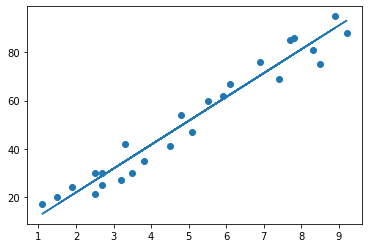

In [17]:
#Plotting the regression line
line= regressor.coef_*x+regressor.intercept_

#Plotting for the test data
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

Making Predictions

Now that have trained our algorithm, it's time to make some predictions

In [18]:
print(x_test) #testing data-in hours
y_pred= regressor.predict(x_test) #Predicting tthe scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [22]:
#Comparing Actual vs Predicted 
df= pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Now Testing Model


In [27]:
score_pred= np.array([9.25])
score_pred=score_pred.reshape(-1,1)
predict=regressor.predict(score_pred)
print("No. of hours={}".format(9.25))
print("Predicted score={}".format(predict[0]))

No. of hours=9.25
Predicted score=93.69173248737538


Evaluting the Model

The final step is to evalute the performance of algorithm. The step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity I have chossen the mean square error. There are many such metrics.

In [28]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
